# Analysis of Gross national income (GNI)

Imports and set magics:

In [70]:
# Importing API from DST, specifying the language
import pydst                          
Dst = pydst.Dst(lang='en')            
# Importing packages for data analysis 
import pandas as pd                   
import numpy as np                    
import matplotlib.pyplot as plt       
import ipywidgets as widgets             

# Autoreloading modules when code is run
%load_ext autoreload
%autoreload 2

# Local modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

**Read the  data** from DSTI. We want to analyze the table named NKN2 including the Danish gross national income  by transaction and price unit:

In [71]:
#In order to retrieve the dataset 'NKN2' from DST, we run the following code
Dst.get_data(table_id = 'NKN2')      


,TRANSAKT,PRISENHED,SÆSON,TID,INDHOLD
0,B.1*g Gross domestic product,Current prices,Non-seasonally adjusted,1990Q1,210169


**Next, we want to get an overview** of the variables in the dataset:

In [72]:
#To retrieve the different varibles of the dataset, we run the following code
Dst.get_variables(table_id = 'NKN2') 

,id,text,elimination,time,values
0,TRANSAKT,transaction,False,False,"[{'id': 'B1GQD', 'text': 'B.1*g Gross domestic..."
1,PRISENHED,price unit,False,False,"[{'id': 'V', 'text': 'Current prices'}, {'id':..."
2,SÆSON,seasonal adjustment,False,False,"[{'id': 'N', 'text': 'Non-seasonally adjusted'..."
3,Tid,time,False,True,"[{'id': '1990K1', 'text': '1990Q1'}, {'id': '1..."


**Now, we want to extract the seasonally adjusted GNI for the entire period**:

In [73]:
#The following code extracts the desided variables and shows the first and last three rows of the dataset
fuldt_dataset = Dst.get_data(table_id = 'NKN2',
                             variables = {'TRANSAKT':['B1GQD'], 
                                          'PRISENHED':['V'], 
                                          'SÆSON':['Y'],
                                          'TID':['*']})           

In [74]:
#We now remove redundant variables, so only time and GNI remain.
df1 = fuldt_dataset.drop(columns=['TRANSAKT', 'PRISENHED', 'SÆSON'], axis=1) 
df1.columns = ['Tid', 'GNI']                        
df1['GNI'].replace('..',np.nan, inplace=True)
df1.dropna(inplace=True)       

Time and GNI is extracted as arrays. Empty cells are removed, converting the variable to a float type:

In [75]:
#Replacing empty cells with NA and drop rows of NA                
df1['GNI'].replace('..',np.nan, inplace=True)
df1.dropna(inplace=True) 


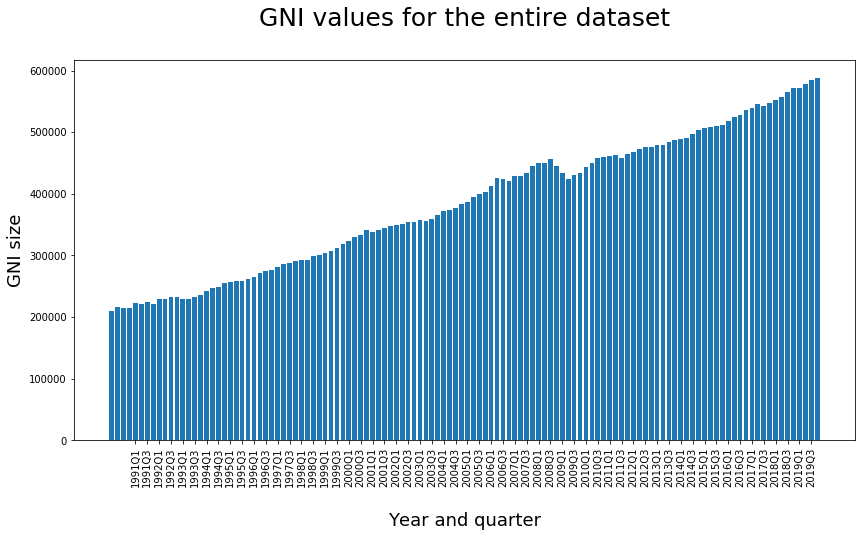

In [76]:
#Barplot of GNI over time
plt.figure(figsize=(14,7))
plt.xlabel('\nYear and quarter', size=18)           # Sets label on t variable
plt.ylabel('GNI size', size=18)                     # Sets label on GNI variable
plt.bar(df1['Tid'], df1['GNI'], label='GNI')                          # Plots GNI
plt.title('GNI values for the entire dataset\n', size=25)  # Sets title of the plot
plt.xticks(df1['Tid'][4:] , rotation='vertical')                # Makes time units appear on the x axis
plt.locator_params(axis='x', nbins=len(df1['Tid'][4:])/2) 
plt.show()

## Analyzing the dataset

**Now, we are interested at looking at the growth rate and descriptive statistics of the dataset.** Summarizing the data, we find:

In [77]:
df1['GNI'].describe()


count       120.000000
mean     385179.391667
std      110077.898437
min      210498.000000
25%      287099.500000
50%      385882.500000
75%      474208.500000
max      587989.000000
Name: GNI, dtype: float64

**Note:** COMMENT ON THESE FINDINGS

In order to be able to **explore the raw data**, we now plot the growth rate of GNI

In [78]:
#Calculating the growth rate
df1['Growth'] = df1['GNI'].pct_change()     


Visualization

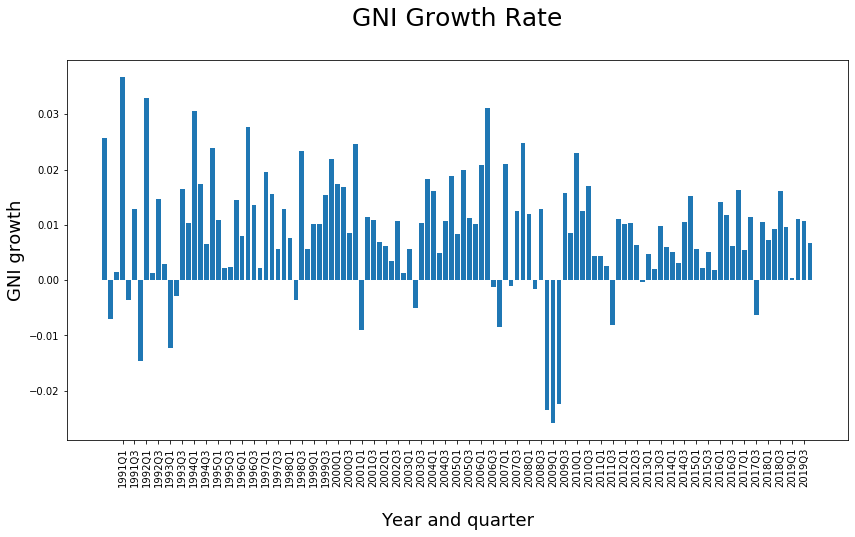

In [79]:

plt.figure(figsize=(14,7))
plt.xlabel('\nYear and quarter', size=18)          
plt.ylabel('GNI growth', size=18)                  
plt.bar(df1['Tid'], df1['Growth'], label='Growth of GNI')               
plt.title('GNI Growth Rate\n', size=25)  
plt.xticks(df1['Tid'][4:], rotation='vertical')       
plt.locator_params(axis='x', nbins=len(df1['Tid'][4:])/2) 

**Note:** COMMENT ON THESE FINDINGS

# Calculating moving averages

We now want to calculate the exponential moving averages of GNI in order to better capture the movement of the trend:

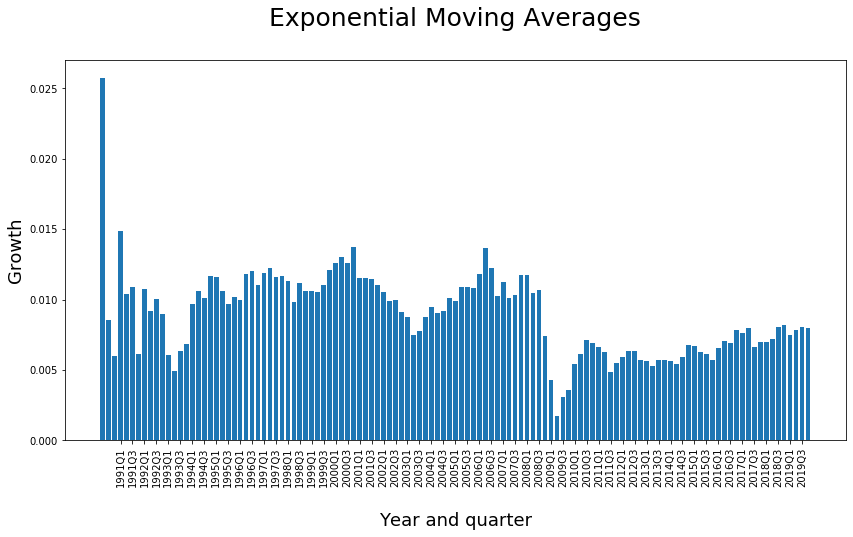

In [80]:
#df1['EMA']=df1['Growth'].ewm(span=20).mean().plot(style='k')
df1['EMA']=df1['Growth'].ewm(span=20).mean()


#Plotting Exponential Moving Averages
plt.figure(figsize=(14,7))
plt.xlabel('\nYear and quarter', size=18)          
plt.ylabel('Growth', size=18)                  
plt.bar(df1['Tid'], df1['EMA'], label='Growth of GNI')               
plt.title('Exponential Moving Averages\n', size=25)  
plt.xticks(df1['Tid'][4:], rotation='vertical')       
plt.locator_params(axis='x', nbins=len(df1['Tid'][4:])/2) 


ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.